# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [258]:
pip install palmerpenguins

In [259]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder in the sklearn library
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split


In [260]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [261]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [262]:
penguins = load_penguins()
penguins = penguins.dropna()

In [263]:
X=penguins.drop(columns=["bill_depth_mm"], axis = 1)
Y=penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [264]:
data = []

In [265]:
#pipeline 1
ct= ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm"])
    ],
    remainder="drop"
)

lr_pipeline = Pipeline(
  [("standardize", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

fitted_model = lr_pipeline.fit(X_train, y_train)
Xtrain_preds = fitted_model.predict(X_train)
Xtest_preds = fitted_model.predict(X_test)




data.append({
    "Model": 1,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})

In [266]:
#pipeline 2

ct2= ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm"]),
    ],
    remainder="drop"
)

lr_pipeline2 = Pipeline(
  [("standardize", ct2),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

fitted_model2 = lr_pipeline2.fit(X_train, y_train)
Xtrain_preds = fitted_model2.predict(X_train)
Xtest_preds = fitted_model2.predict(X_test)



data.append({
    "Model": 2,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})


In [267]:
#pipeline 3

ct3= ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm","body_mass_g" ]),
    ],
    remainder="drop"
)

lr_pipeline3 = Pipeline(
  [("standardize", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

fitted_model3 = lr_pipeline3.fit(X_train, y_train)
Xtrain_preds = fitted_model3.predict(X_train)
Xtest_preds = fitted_model3.predict(X_test)



data.append({
    "Model": 3,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})



In [268]:
#pipeline 4

ct4= ColumnTransformer(
    [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm","body_mass_g" ]),
    ],
    remainder="drop"
)

lr_pipeline4 = Pipeline(
  [("standardize", ct4),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


fitted_model4 = lr_pipeline4.fit(X_train, y_train)
Xtrain_preds = fitted_model4.predict(X_train)
Xtest_preds = fitted_model4.predict(X_test)

data.append({
    "Model": 4,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})




In [269]:
data = pd.DataFrame(data)
data

,Model,test_MSE,train_MSE
0,1,3.338650,3.778535
1,2,2.003309,2.569569
2,3,1.988142,2.558305
3,4,1.272249,1.334247


In [270]:
from plotnine import ggplot, aes, geom_point, geom_line, labs

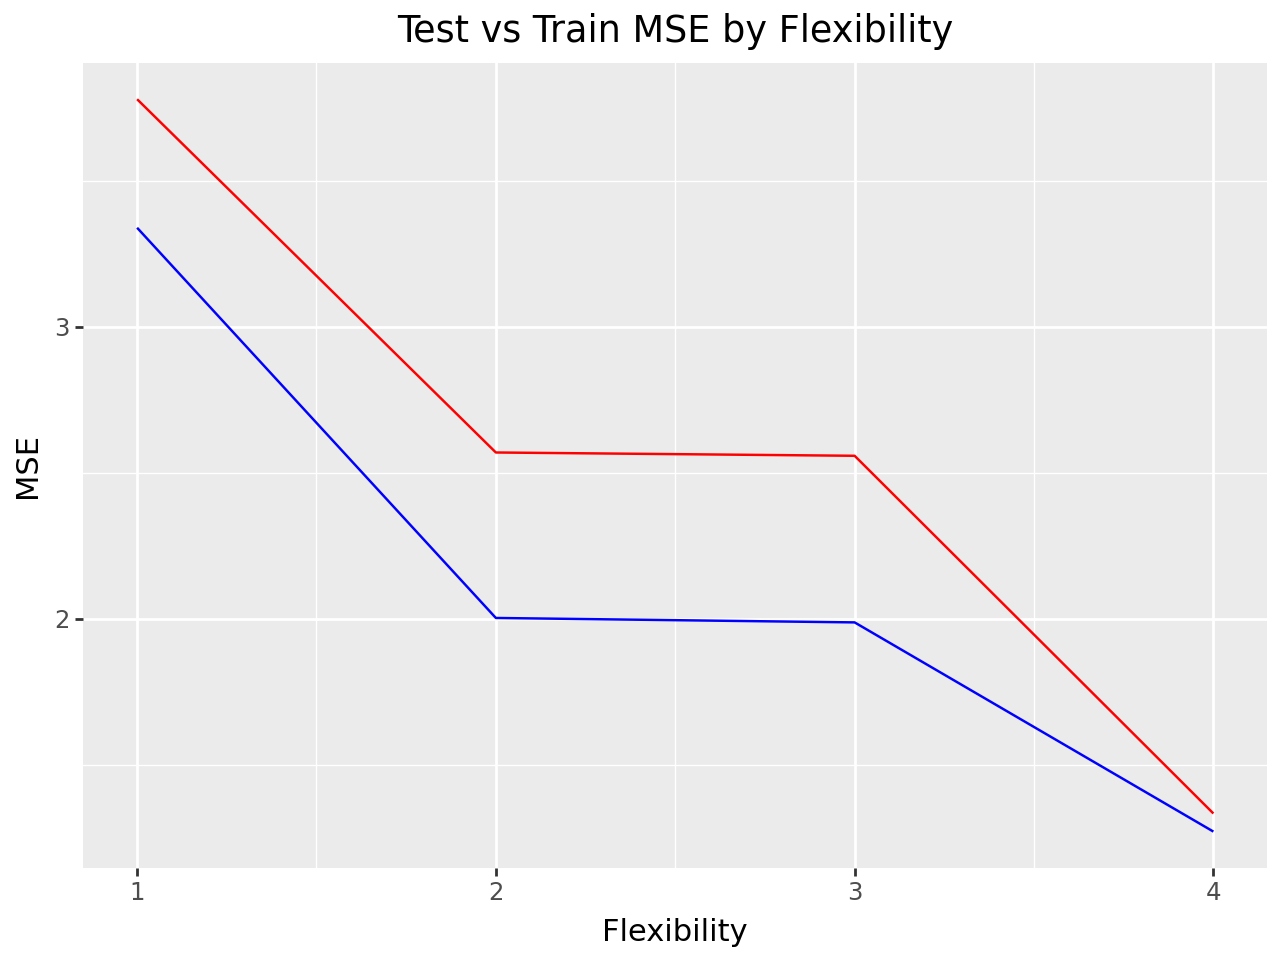

In [271]:
#create a line graph
(
    ggplot(data, aes(x='Model'))
    +geom_line(aes(y="test_MSE"), color='blue')
    +geom_line(aes(y="train_MSE"), color='red')
    +labs(title='Test vs Train MSE by Flexibility', x='Flexibility', y='MSE')
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [272]:
# Code Here

The 4th model appears to  the best because it has the least MSE. We can see the model with 4 variables was better than 1.